# IS509 Assignment 1

### Due: November 14, Sunday-23.59

### Submission and Grading Policy

- Submit your assignments to the corresponding assignment link in https://odtuclass.metu.edu.tr.
- Solutions should be submitted in a single **ipynb** file named: metu-username_HW_1.ipynb (e.g., “e123456_HW_1.ipynb”).
- Late submissions will be accepted by November 17, 2021, 23:59 with a 5% per day penalty.
- Do not change variable names in the code blocks and the texts in the markdowns.
- **<font color=#C91414>This is an individual assignment. Please do not collaborate. You have to adhere to the academic integrity principles.</font>** 
- You are supposed to be able to interpret your findings. Therefore, you should not find a number or result and just leave it. You also need to comment on your findings by giving as much as **necessary** details.

------------

### The aim of this assignment is getting you familiar with
- Python and Jupyter notebook
- simple data cleaning
- descriptive statistics interpretation and
- visualizing methods


**1. Import pandas, numpy, matplotlib and seaborn libraries.**  
If you need another library or packages, you may upload them too.

In [1]:
from scipy import stats
import statsmodels.api as sm 
import pylab as py 

### answer ###

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
# for qq plots #
import statsmodels.api as sm

**2. Upload the data as a pandas dataframe and show the first three rows.**

In [2]:
### answer ###

filepath = '/Users/selincaglar/Documents/IS-MSc/IS509/Homeworks_IS509/HW1_IS509/data.csv' 
data = pd.read_csv(filepath)
data.head(3)

,number_of_room,neighbourhood,material_quality,age,distance,number_of_bathroom,area,balcony,thermal_insulation_point,air_quality,price
0,3,Moderate,B,15.01,685.0,1,97.0,yes,22.4,23.3,384.8
1,4,Moderate,D,0.19,373.0,2,180.0,no,21.1,21.2,1182.2
2,2,Moderate,C,19.37,635.0,1,135.0,yes,25.4,27.3,469.1


----------
### Data Explanation

**number_of_room:** number of room in the house    
**neighbourhood:** the score for the neighbourhood (very low, low, moderate, high, very high)    
**material_quality:** the material quality of the house    
**age:** age of the house (in years)    
**distance:** the distance to the nearest public transportation (in meters)     
**number_of_bathroom:** number of bathroom   
**area:** house area      
**balcony:** Does the house have a balcony?
**thermal_insulation_point:** score for thermal insulation    
**air_quality:** air quality in the neighbourhood    
**price:** price of the house (in USD K)    
     

**3. How many features and observations are there in the data set (rows x columns)?**

In [3]:
### answer ###

data.shape

(3000, 11)

### <span style="background-color:#C91414">Usually you need to deal with low quality data </span> 

**4.Change encoding of the neighbourhood, material_quality and balcony as stated below.**       
For neighbourhood; Very Low=1, Low=2, Moderate=3, High=4, Very High=5   
For material_quality; A=1, B=2, C=3, D=4   
For balcony; no=0 , yes=1  

In [4]:
### answer ###

data.neighbourhood.replace(('Very Low', 'Low', 'Moderate', 'High', 'Very High'), (1, 2, 3, 4, 5), inplace=True)
data.material_quality.replace(('A', 'B', 'C', 'D'), (1, 2, 3, 4), inplace=True)
data.balcony.replace(('yes', 'no'), (1, 0), inplace=True)

In [5]:
data.head()

,number_of_room,neighbourhood,material_quality,age,distance,number_of_bathroom,area,balcony,thermal_insulation_point,air_quality,price
0,3,3.0,2.0,15.01,685.0,1,97.0,1.0,22.4,23.3,384.8
1,4,3.0,4.0,0.19,373.0,2,180.0,0.0,21.1,21.2,1182.2
2,2,3.0,3.0,19.37,635.0,1,135.0,1.0,25.4,27.3,469.1
3,3,3.0,2.0,24.44,671.0,1,122.0,0.0,30.0,50.7,325.8
4,4,5.0,1.0,4.20,635.0,2,157.0,1.0,24.8,41.4,734.2


Notice that although some columns contain numerical values, sometimes they are not reflected in the describe() method. The reason of this, these columns are read as strings. If you face this problem, to fix it,  please run the below code.
> data= data.apply(pd.to_numeric)
   
Please be aware that the numeric encoding of a column does not mean that the variable/attribute itself is numerical.  


**5.Rename the name of "air_quality" column as "air_quality_score"**

In [6]:
print(data.columns) ## .columns returns the column names of the DataFrame.   

Index(['number_of_room', 'neighbourhood', 'material_quality', 'age',
       'distance', 'number_of_bathroom', 'area', 'balcony',
       'thermal_insulation_point', 'air_quality', 'price'],
      dtype='object')


In [7]:
### answer ###

data.rename(columns={'air_quality': 'air_quality_score'}, inplace=True)

In [8]:
data.head()

,number_of_room,neighbourhood,material_quality,age,distance,number_of_bathroom,area,balcony,thermal_insulation_point,air_quality_score,price
0,3,3.0,2.0,15.01,685.0,1,97.0,1.0,22.4,23.3,384.8
1,4,3.0,4.0,0.19,373.0,2,180.0,0.0,21.1,21.2,1182.2
2,2,3.0,3.0,19.37,635.0,1,135.0,1.0,25.4,27.3,469.1
3,3,3.0,2.0,24.44,671.0,1,122.0,0.0,30.0,50.7,325.8
4,4,5.0,1.0,4.20,635.0,2,157.0,1.0,24.8,41.4,734.2


Notice that some data points are missing. For example, see the value of the balcony by typing **print(data.iloc[64])**    
**6. Find and print the number of missing values in each column**

In [9]:
print(data.iloc[64])
### answer ###

data.isna().sum()

number_of_room                2.00
neighbourhood                 3.00
material_quality              2.00
age                          24.25
distance                    681.00
number_of_bathroom            1.00
area                         86.00
balcony                        NaN
thermal_insulation_point     32.50
air_quality_score            35.30
price                       298.40
Name: 64, dtype: float64


number_of_room                0
neighbourhood                12
material_quality             55
age                           0
distance                      0
number_of_bathroom            0
area                          0
balcony                     316
thermal_insulation_point     23
air_quality_score             0
price                         0
dtype: int64

**7. Drop the columns which have more than %10 missing value rate.**

In [10]:
### answer ###

data = data[data.columns[data.isna().sum()/len(data.index) < 0.1]]

**8. Create a dataframe named data_wo_na by dropping the rows which have missing values.  
What is the shape (rows x columns) of newly created data frame "data_wo_na"?**   
Please do the rest of the assignment with data_wo_na.

In [11]:
### answer ###

data_wo_na = data.dropna()

data_wo_na.shape

(2910, 10)

**9. Summarize and briefly interpret the data with appropriate descriptive statistics.  
Comment on the distribution of the attributes (bell-shaped, left-skewed, right-skewed, or how peaked etc.) <font color=#C91414> just by looking at descriptive statistics.</font> 
While answering Q10, you may want to revise your comments.**    
Hint: The purpose of this question is to measure whether you can comment on the distribution of data by looking at descriptive statistics. 
However, just looking at the descriptive statistics is not always enough. For this reason, it is stated that after answering Q10 (after visualizing the data), you may want to revise your comments.

**Double click and write your explanations and comments here.**

number_of_room: Numeric, Discrete.
Since Mean = 2.787285 < Median = Mode = 3.000000, we may observe a slightly left-skewed distribution.
std = 1.023500, coefficient of variation = 36.72%

neighbourhood: Categorical, Ordinal.
For ordinal data, Median and Mode are meaningful for the measure of central tendency.
Since Median = 4.000000 > Mode = 3.0, we may observe a right-skewed distribution.
For the measure of dispersion, Range and IQR are meaningful for ordinal data.
Here, Range = 5.000000 - 1.000000 = 4.000000 and IQR = Q3 - Q1 = 5.000000 - 3.000000 =  2.000000
We should not use the standard deviation because calculating mean for ordinal data is not meaningful. 

material_quality: Categorical, Ordinal.
Median = 2.000000 = Mode = 2.0, hence maybe we can see a symmetric distribution
Range = 4.000000 - 1.000000 = 3.000000
IQR = 3.000000 - 1.000000 = 2.000000

age: Numeric, Continuous.
Since Mean = 14.519753 > Median = 13.215000 > Mode1 = 7.94 and Mode2 = 9.98, we may observe a right-skewed distribution
std = 10.136688, coefficient of variation = 69.81% Dispersion compared with the mean seems to be high. 

distance: Numeric, Continuous.
Since Mean = 612.227148 < Median = 638.000000 < Mode = 686.0, we may observe a left-skewed distribution
std = 89.053838, coefficient of variation = 14.55%

number_of_bathroom: Numeric, Discrete.
Since Mean = 1.240893 > Median = Mode = 1.000000, we may observe a slightly right-skewed distribution
std = 0.427699, coefficient of variation = 34.47%

area: Numeric, Continuous.
Since Mean = 111.069072 < Median = 115.000000, we may observe a left-skewed distribution 
Mode = 70 but Mean and Median are much larger than this value so we may observe a high block for mode of 70. 
std = 38.516978, coefficient of variation = 34.68%

thermal_insulation_point: Numeric, Continuous.
Since Mean = 59.844811 < Median = 73.300000 < Mode = 90.8, we may observe a left-skewed distribution
std = 27.326886, coefficient of variation = 45.66%

air_quality_score: Numeric, Continuous.
Since Mean = 30.618522 > Median = 27.500000 > Mode = 22.8, we may observe a right-skewed distribution
std = 11.280134, coefficient of variation = 36.84%

price: Numeric, Continuous.
Since Mean = 629.725430 > Median = 610.350000, we may observe a right-skewed distribution
std = 217.144912, coefficient of variation = 34.48%

In [12]:
### answer ###

data_wo_na.describe()

,number_of_room,neighbourhood,material_quality,age,distance,number_of_bathroom,area,thermal_insulation_point,air_quality_score,price
count,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000,2910.000000
mean,2.787285,3.656357,2.153265,14.519753,612.227148,1.240893,111.069072,59.844811,30.618522,629.725430
std,1.023500,1.149881,0.864813,10.136688,89.053838,0.427699,38.516978,27.326886,11.280134,217.144912
min,1.000000,1.000000,1.000000,0.020000,17.000000,1.000000,35.000000,20.600000,13.900000,114.900000
25%,2.000000,3.000000,1.000000,5.540000,579.000000,1.000000,76.000000,27.900000,22.900000,466.575000
50%,3.000000,4.000000,2.000000,13.215000,638.000000,1.000000,115.000000,73.300000,27.500000,610.350000
75%,4.000000,5.000000,3.000000,22.740000,675.000000,1.000000,141.000000,85.475000,35.175000,764.875000
max,4.000000,5.000000,4.000000,45.510000,740.000000,2.000000,190.000000,91.000000,99.600000,1298.500000


In [13]:
data_wo_na.mode()

,number_of_room,neighbourhood,material_quality,age,distance,number_of_bathroom,area,thermal_insulation_point,air_quality_score,price
0,3.0,3.0,2.0,7.94,686.0,1.0,70.0,90.8,22.8,487.3
1,NaN,NaN,NaN,9.98,NaN,NaN,NaN,NaN,NaN,629.5
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,637.6
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735.4
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,774.5
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,784.3


**10. Visualize the distributions of the numeric attributes. Comment whether they are similar to Gaussian/Normal distirbution or not. Give your reasons and support them with appropriate visualization techniques.**     
Support your answer with what you found in the previous question.
Hint: You can use subplotting to see the several plots of same attribute at a one time.

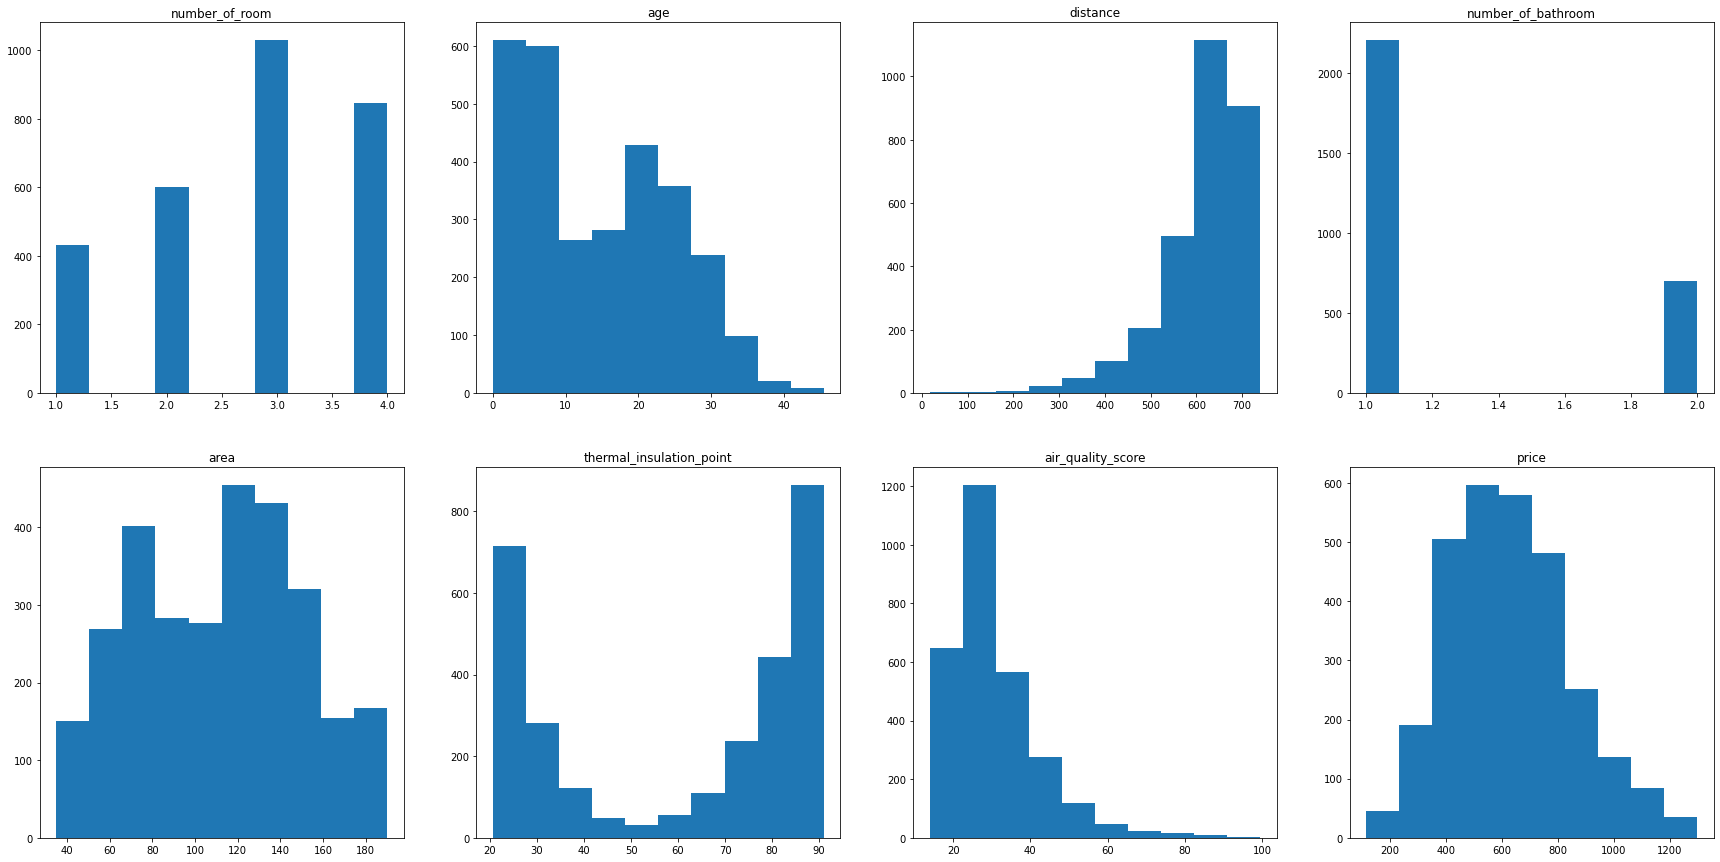

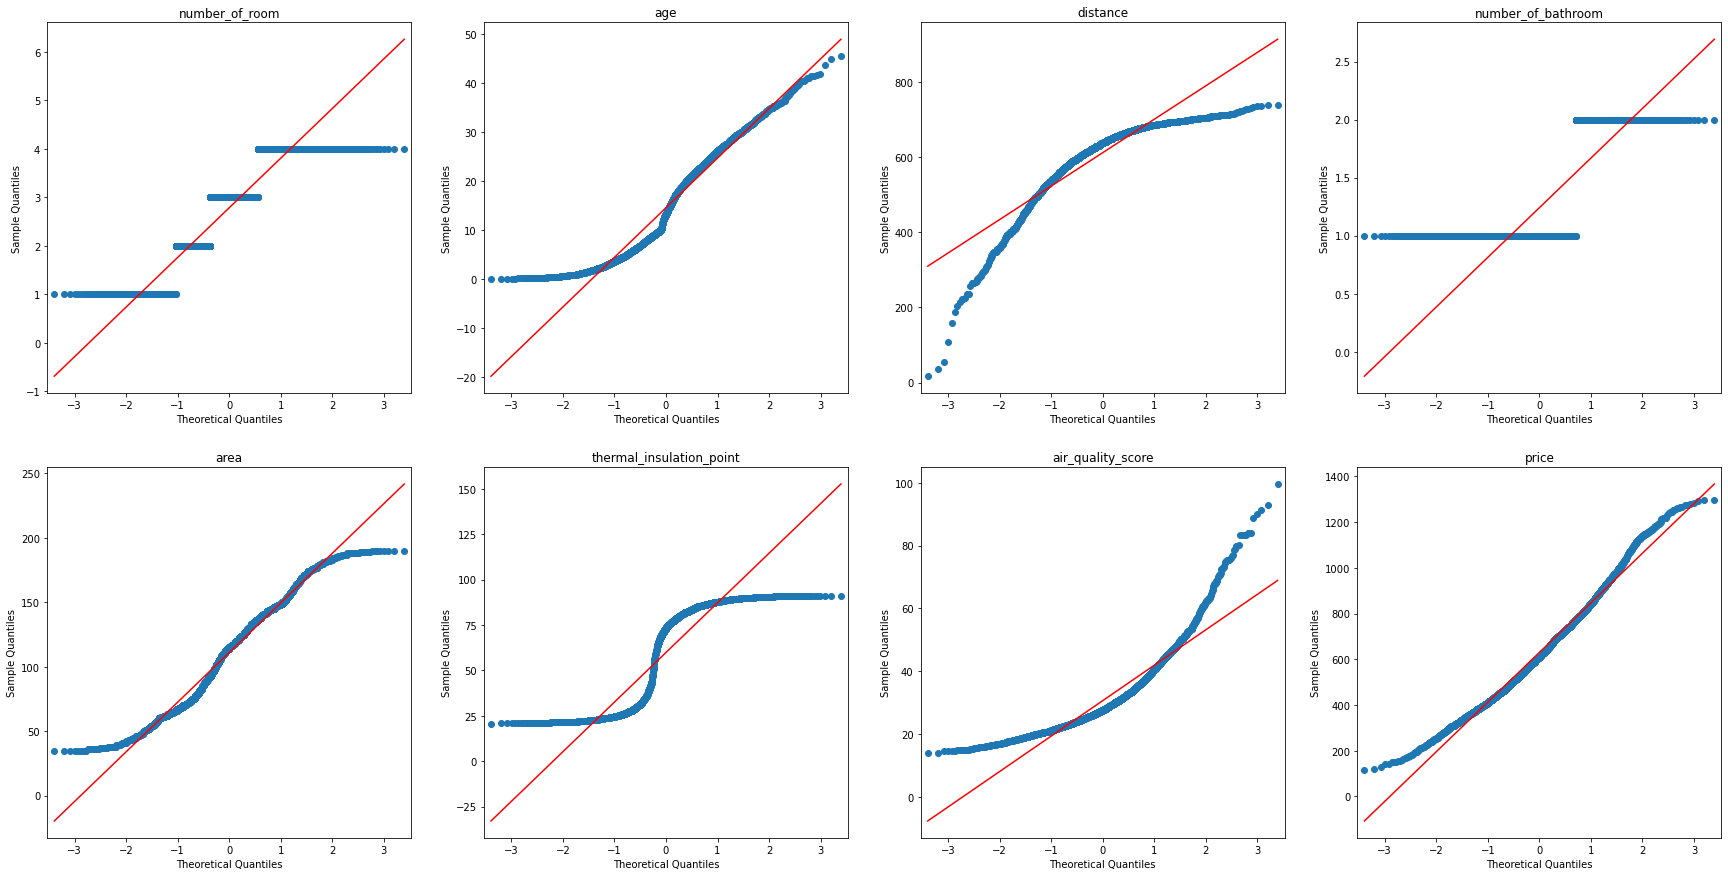

In [14]:
# answer

rows=2
columns=4
f, axes = plt.subplots(rows,columns, figsize=(30, 15))
numeric_columns = ['number_of_room','age','distance','number_of_bathroom','area','thermal_insulation_point','air_quality_score', 'price']
r = 0
c = 0
i =  numeric_columns[0]
axes[r,c].hist(data_wo_na[i])
axes[r,c].set_title(data_wo_na.columns[0])
c = 1
for k in range(3,10):
    i = numeric_columns[k-2]
    if c < 4:
        axes[r,c].hist(data_wo_na[i])
        axes[r,c].set_title(data_wo_na.columns[k])
        c = c + 1
    else:
        r = 1
        axes[r,c-4].hist(data_wo_na[i])
        axes[r,c-4].set_title(data_wo_na.columns[k])
        c = c + 1
rows=2
columns=4
f, axes = plt.subplots(rows,columns, figsize=(30, 15))
count=0
numeric_columns = ['number_of_room','age','distance','number_of_bathroom','area','thermal_insulation_point','air_quality_score', 'price']
r = 0
c = 0
i =  numeric_columns[0]
sm.qqplot(data_wo_na.iloc[:,0], line="s", ax=axes[r,c])
axes[r,c].set_title(data_wo_na.columns[0])
c = 1
for k in range(3,10):
    i = numeric_columns[k-2]
    if c < 4:
        sm.qqplot(data_wo_na.iloc[:,k], line="s", ax=axes[r,c])
        axes[r,c].set_title(data_wo_na.columns[k])
        c = c + 1
    else:
        r = 1
        sm.qqplot(data_wo_na.iloc[:,k], line="s", ax=axes[r,c-4])
        axes[r,c-4].set_title(data_wo_na.columns[k])
        c = c + 1

**Double click and write your explanations here.**  

number_of_room: 
This attribute cannot be Normal since it is discrete. According to the histogram, it seems left-skewed.
In QQ plot we observe steps instead of a continuous line. It is expected since it is a discrete attribute. 
For continuous attributes, we may observe a continuous line or a QQ plot like this. 

age: 
The distribution seems to be bimodal according to the histogram. We cannot claim that it is Normal. 
QQ plot also indicates that it does not look like Normal Distribution.

distance: 
It looks like left-skewed, similarly not Normal since it is not symmetric around the mean. 
QQ plot also shows that it does not look like Normal. 

number_of_bathroom: 
It cannot be Normal since this attribute is not continuous but discrete. It has 2 possible values 1 or 2. 
Histogram shows us that approximately 1/4 of the data has a value of 1 where the remaining 3/4 has 2 bathrooms. 
In QQ plot we observe steps as we expect. 

area: 
In Question 9, I thought it may be left-skewed but it does not seem so because of Mode being less than Mean and Median. Mean = 111.069072 Median = 115.000000 Mode = 70 
We cannot assume that it has Normal distribution. 
According to QQ plot, it does not seem to be Normal either. 

thermal_insulation_point: It has an interesting histogram shape I believe but we cannot claim it is Normal. 
In Question 9, I thought that it may be left-skewed but with the help of histogram we can see that it is not the case.
It seems to be bimodal. 
QQ plot also indicates that it does not look like Normal Distribution. 

air_quality_score: 
It looks like right-skewed similar to the comment in Question 9. 
We cannot say it is Normal because values are not symmetric around the mean. 

price: 
In Question 9, I thought it may be right-skewed. The histogram also seem to be slightly right-skewed. 
In terms of Normality, in addition to the histogram I would like to check QQ plot as well. 
We observe that in the middle portion of the line it fits with the Normal curve. 
However, it distinguishes in left and right parts of the line. 
Hence, we cannot assume that it has Normal Distribution. 

**11. For categoric attributes draw countplots and briefly comment on them.**  
Hint: You can use seaborn library. Please see the documentation via https://seaborn.pydata.org/api.html.

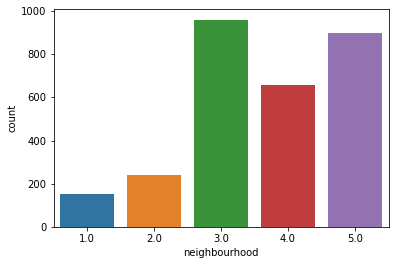

In [15]:
# answer

s = sns.countplot(x="neighbourhood", data=data_wo_na)

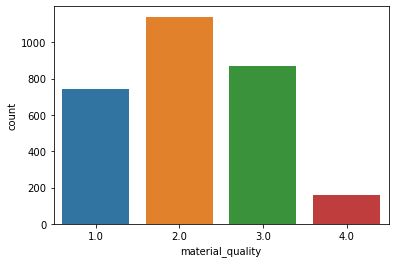

In [16]:
d = sns.countplot(x="material_quality", data=data_wo_na)

**Double click and write your explanations and comments here.**

neighbourhood: 
It seems left-skewed since we observe a tail on left.
Since Median > Mode, in Question 9, I thought that it may be right-skewed. 

material_quality: 
It seems right-skewed. In question 9, my comment was to have a symmetric distribution since Mode = Median.

**12. Determine the appropriate descriptive location measure for each of the numerical attributes.**

**Double click and write your explanations and comments here.**

number_of_room: Mean equals to 2.787285. From histogram, we observe that the distribution is not symmetric around the mean. Hence, mean and median should be used for the measure of location together. 

age: Mean = 14.519753 > Median = 13.215000 > Mode1 = 7.94 and Mode2 = 9.98
Mean and the median are close to each other but because of modes 7.94 and 9.98 we observe 2 large blocks at the left-hand-side of the histogram. Hence, mean and mode can be used. 

distance: We have a left-skewed distribution. Hence, mean and median should be considered together as the measure of location. 

number_of_bathroom: Mean is meaningful. Median would not provide information since the number of bathroom attribute takes only 2 possible values which are 1 and 2.

area: Mode = 70 < Mean = 111.069072 < Median = 115.000000 
Mean, median and mode should be considered together. 

thermal_insulation_point: From the histogram we observe that values are not symmetric around the mean since the median is different than the mean. Hence, mean and median are meaningful to be considered together for the measure of location. 

air_quality_score: Similar to the distance attribute, now we have a right-skewed distribution. Therefore, mean and median should be considered together. 

price: Mean and median should be used for the measure of location. 

**13. Find out whether there are any outliers and make one suggestion regarding how to deal with them.**

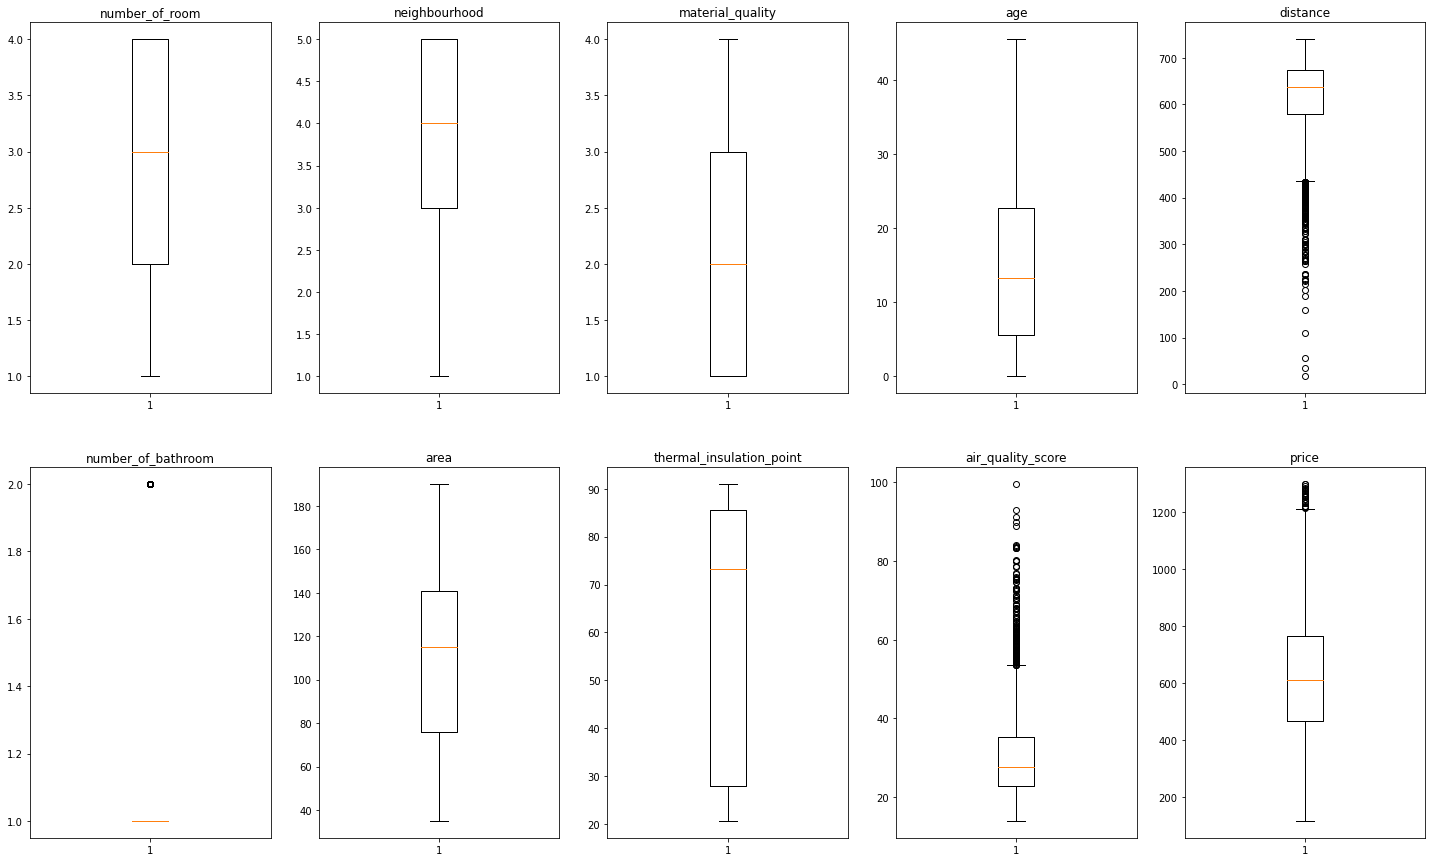

In [17]:
### answer ###

rows=2
columns=5
f, axes = plt.subplots(rows,columns, figsize=(25, 15))
count=0
for i in range(rows):
    for j in range(columns): 
        axes[i,j].set_title(data_wo_na.columns[count])
        axes[i,j].boxplot(data_wo_na.iloc[:,count])
        count=count+1   

**Double click and write your explanations and comments here.**

I prefer to use boxplot method to investigate outliers for each attribute. 
It can be implemented with both numeric and ordinal data. 

From above results, we observe that the following columns have no outliers:
number_of_room, neighbourhood, material_quality, age, area, thermal_insulation_point --> no outliers 

distance, number_of_bathroom, air_quality_score, price --> have outliers 

In order to see the number of outliers for each column, we may run the following code. 

We may remove these outliers from our data. 

In [18]:
for columns in data_wo_na.columns:
    quantiles=data_wo_na[columns].quantile(q=[0.25,0.50,0.75]).values
    q1=quantiles[0]
    q2=quantiles[1]
    q3=quantiles[2]
    iqr=q3-q1
    outliers=data_wo_na[(data_wo_na[columns] < q1-1.5*iqr ) | (data_wo_na[columns] >  q3+ 1.5*iqr)][columns]
    print("number of outliers in", columns, ":", (len(outliers)))

number of outliers in number_of_room : 0
number of outliers in neighbourhood : 0
number of outliers in material_quality : 0
number of outliers in age : 0
number of outliers in distance : 164
number of outliers in number_of_bathroom : 701
number of outliers in area : 0
number of outliers in thermal_insulation_point : 0
number of outliers in air_quality_score : 124
number of outliers in price : 25


**14. Visualize the distributions of all numeric attributes grouped by the "number_of_room" variable using violin plots. Comment on the results.**  
Hint: Please see the seaborn library documentation via https://seaborn.pydata.org/api.html.

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


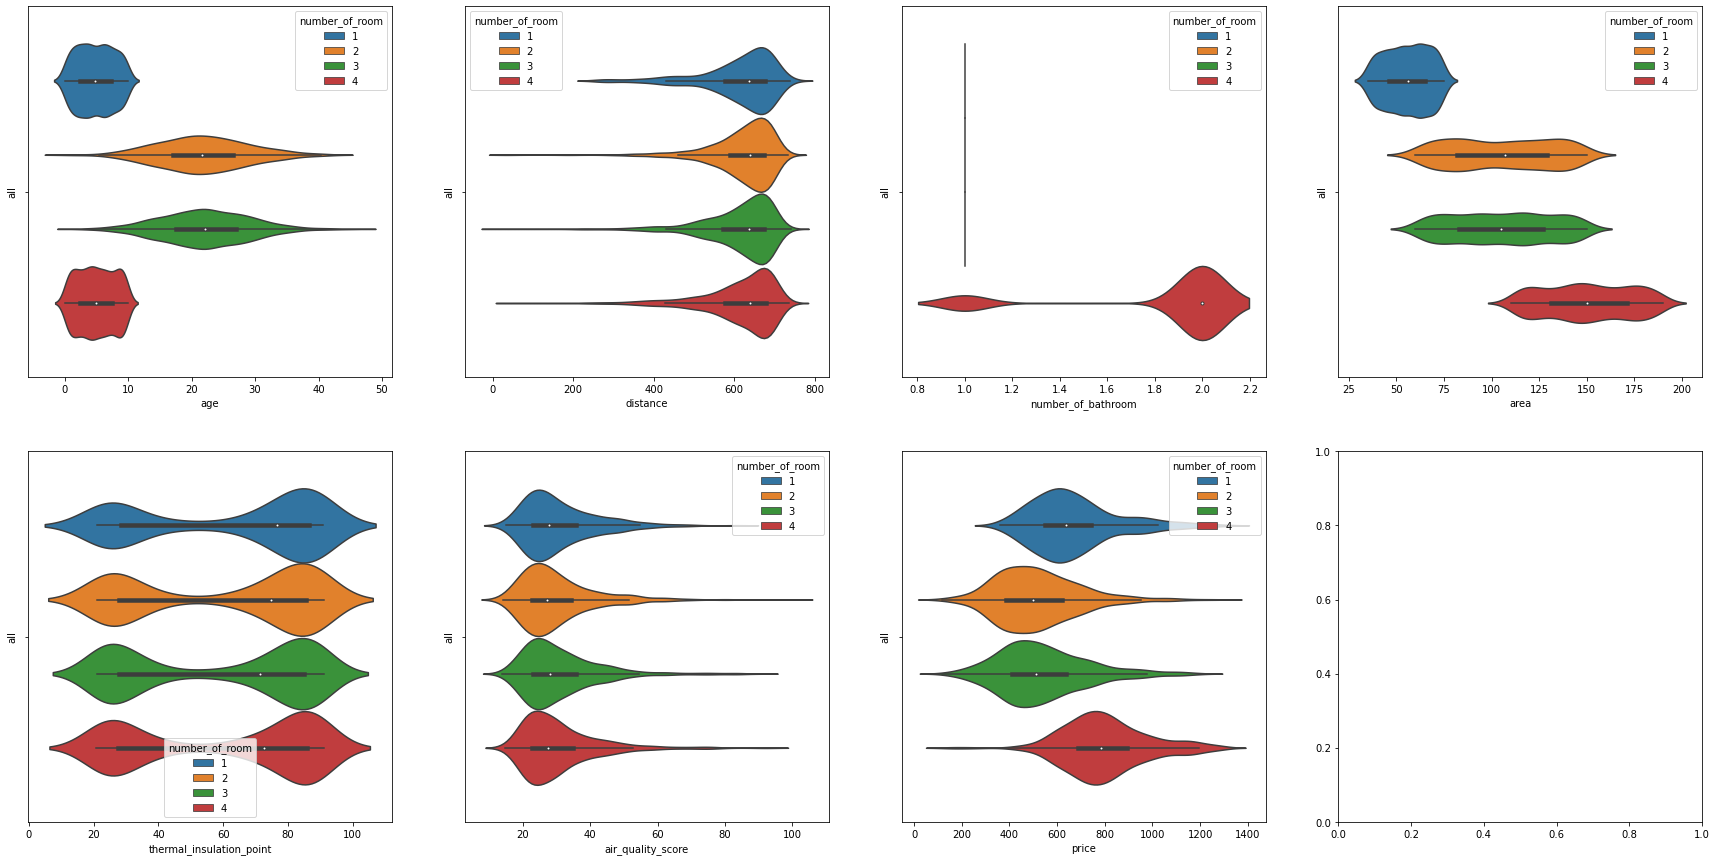

In [19]:
### answer ###

rows=2
columns=4
f, axes = plt.subplots(rows,columns, figsize=(30, 15))
data_wo_na.loc[:, 'all']=""

s = sns.violinplot(x="age", y="all", hue="number_of_room", data=data_wo_na, ax=axes[0,0])
s = sns.violinplot(x="distance", y="all", hue="number_of_room", data=data_wo_na, ax=axes[0,1])
s = sns.violinplot(x="number_of_bathroom", y="all", hue="number_of_room", data=data_wo_na, ax=axes[0,2])
s = sns.violinplot(x="area", y="all", hue="number_of_room", data=data_wo_na, ax=axes[0,3])
s = sns.violinplot(x="thermal_insulation_point", y="all", hue="number_of_room", data=data_wo_na, ax=axes[1,0])
s = sns.violinplot(x="air_quality_score", y="all", hue="number_of_room", data=data_wo_na, ax=axes[1,1])
s = sns.violinplot(x="price", y="all", hue="number_of_room", data=data_wo_na, ax=axes[1,2])

**Double click and write your explanations and comments here.**

age: We observe that if the age value is greater than or equal to 10 for a house, the number of room cannot be 1 or 4, it can be estimated as 2 or 3. However, if it is less than 10, the number of room can be 1,2,3 or 4. In this case, 1 and 4 are more likely to be observed. 

distance: We see that if the distance value is less than or equal to 200, the number of room cannot be 1 based on this data. If the distance value is greater than 200, it is hard to estimate the number of room as all groups of rooms have very similar distributions based on the distance. 

number_of_bathroom: We observe that if the number of bathroom is 2, the number of room can be estimated as 4. In addition, if the number of room is 1,2 or 3, the number of bathroom can be estimated as 1. 

area: If the area has a value less than or equal to 50, we can estimate the number of room as 1. 
If it is greater than or equal to 80, the number of room  cannot be 1 based on this dataset. 
If the area has a value greater than or equal to 160, we can estimate the number of room as 4. 

thermal_insulation_point: There are no obvious patterns to make estimations using thermal insulation point and number of room values since we observe similar distributions for each group. 

air_quality_score: The same situation of thermal_insulation_point applies for air quality score as well. 

price: If the price is less than or equal to 350, we can estimate that the number of room will not be equal to 1. 

**15. What does the below violin plot show? Explain.**

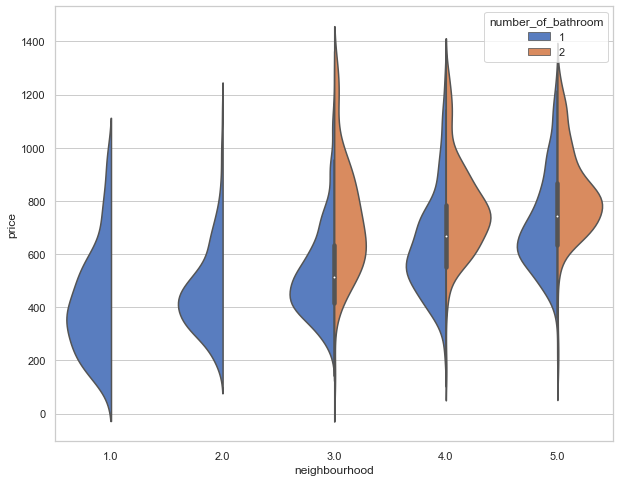

In [20]:
### answer ###
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x="neighbourhood",y="price", hue="number_of_bathroom",  data=data_wo_na, palette="muted", split=True)


**Double click and write your explanations and comments here.**

For a house, if the neighbourhood attribute has a value of 1 or 2, this house has exactly 1 bathroom. 
If the neighbourhood attribute has a value of 3, 4 or 5, we may observe 1 or 2 bathrooms. 
So we can construct a model based on this information for classification. 

In addition, it seems that houses with larger prices tend to have a higher value of neighbourhood value and 2 bathrooms.

**16. Let's first create an array which has an exponential distribution. The code below is an example, you can change the parameters as you want or leave it as is.**

5.32052006764865

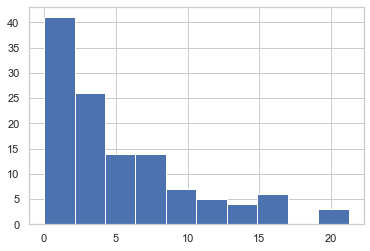

In [21]:
np.random.seed(5) # for reproducibility
array= np.random.exponential(scale=5,size=120)
plt.hist(array)
np.mean(array)

take_samples_from_given_data_calculate_mean: This function takes a sample from the given data with the specified sample size, then calculates the mean of this sample.
For example, take_samples_from_given_data_calculate_mean(array,3) it takes three elements of the array randomly and calculates the mean of them.
Let's take samples from array n=10 times and visualize the distribution of the means of these samples.


(array([2., 1., 0., 1., 2., 1., 1., 0., 0., 2.]),
 array([2.0681074 , 2.43237852, 2.79664964, 3.16092076, 3.52519188,
        3.889463  , 4.25373411, 4.61800523, 4.98227635, 5.34654747,
        5.71081859]),
 <BarContainer object of 10 artists>)

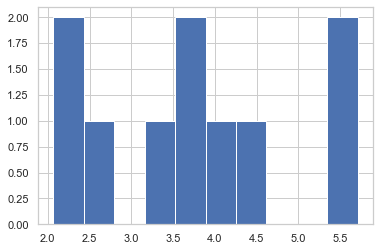

In [22]:
def take_samples_from_given_data_calculate_mean(data, sample_size):
    sample=np.random.choice(data,sample_size, replace=False)
    return np.mean(sample)

n=10
samples_mean_list=[]
for i in range (n):
    samples_mean_list.append(take_samples_from_given_data_calculate_mean(data=array,sample_size=7))  
plt.hist(samples_mean_list)

Now repeat this visualization step for  n=50, n=100, n=500 and n=5000 and comment on your findings.

(array([ 23.,  96., 192., 187., 171., 161.,  89.,  48.,  25.,   8.]),
 array([ 1.28389877,  2.25273388,  3.22156899,  4.19040411,  5.15923922,
         6.12807433,  7.09690944,  8.06574456,  9.03457967, 10.00341478,
        10.9722499 ]),
 <BarContainer object of 10 artists>)

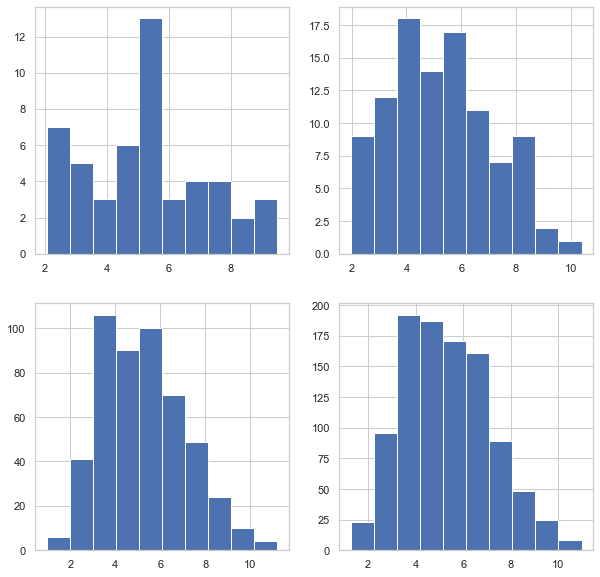

In [23]:
# answer

def take_samples_from_given_data_calculate_mean(data, sample_size):
    sample=np.random.choice(data,sample_size, replace=False)
    return np.mean(sample)

rows=2
columns=2
f, axes = plt.subplots(rows,columns, figsize=(10, 10))

n = 50
samples_mean_list=[]
for i in range (n):
    samples_mean_list.append(take_samples_from_given_data_calculate_mean(data=array,sample_size=7))  
axes[0,0].hist(samples_mean_list)

n = 100
samples_mean_list=[]
for i in range (n):
    samples_mean_list.append(take_samples_from_given_data_calculate_mean(data=array,sample_size=7))  
axes[0,1].hist(samples_mean_list)

n = 500
samples_mean_list=[]
for i in range (n):
    samples_mean_list.append(take_samples_from_given_data_calculate_mean(data=array,sample_size=7))  
axes[1,0].hist(samples_mean_list)

n = 1000
samples_mean_list=[]
for i in range (n):
    samples_mean_list.append(take_samples_from_given_data_calculate_mean(data=array,sample_size=7))  
axes[1,1].hist(samples_mean_list)

**Comments**

From above histograms, we can see that as n increases, the related graph looks more similar to the one we have for the entire population. It means that our estimations become more successful in terms of representing the population. 